In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Carregar os dados
df = pd.read_csv('../estatística/interarrival_service_times.csv')


# Calcular Eststísticas Descritivas

calcula as principais estatísticas descritivas para os tempos de espera e atendimento

In [2]:
print(f'Estatísticas do Tempo de Atendimento:')
#print(df['service_time'].describe())
print(f'Media:', df['service_time'].mean())
print(f'Mediana:', df['service_time'].median())
print(f'Moda:', df['service_time'].mode().values[0])
print('Variância:', df['service_time'].var())
print('Desvio Padrão:', df['service_time'].std())

print(f'\nEstatísticas do Tempo entre Chegadas:')
#print(df['interarrival_time'].describe())
print('Media:', df['interarrival_time'].mean())
print('Mediana:', df['interarrival_time'].median())
print(f'Moda:', df['interarrival_time'].mode().values[0])
print('Variância:', df['interarrival_time'].var())
print('Desvio Padrão:', df['interarrival_time'].std())


Estatísticas do Tempo de Atendimento:
Media: 0.9762249155286272
Mediana: 0.7044784049819143
Moda: 0.0069764091816506
Variância: 0.8245519749609047
Desvio Padrão: 0.908048443069479

Estatísticas do Tempo entre Chegadas:
Media: 1.829496078077743
Mediana: 1.2480008212360847
Moda: 0.0110748407518709
Variância: 3.3840222097036854
Desvio Padrão: 1.8395712026729722


# 2. Visualizar os Dados

## 2.1 Histogramas

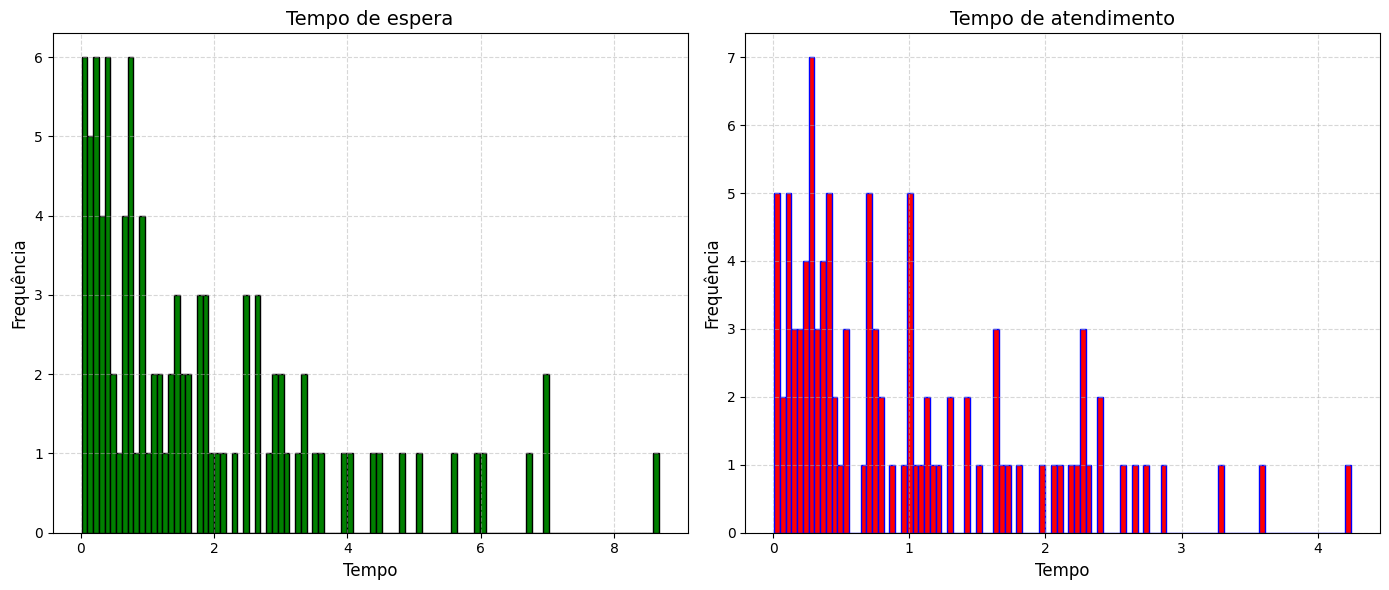

In [3]:
df = df.dropna()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df["interarrival_time"], bins=df["interarrival_time"].count(), color='green', edgecolor='black')
plt.title("Tempo de espera", fontsize=14)
plt.xlabel("Tempo", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(1, 2, 2)
plt.hist(df["service_time"], bins=df["service_time"].count(), color='red', edgecolor='blue')
plt.title("Tempo de atendimento", fontsize=14)
plt.xlabel("Tempo", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## 2.2 Boxplot Comparativo

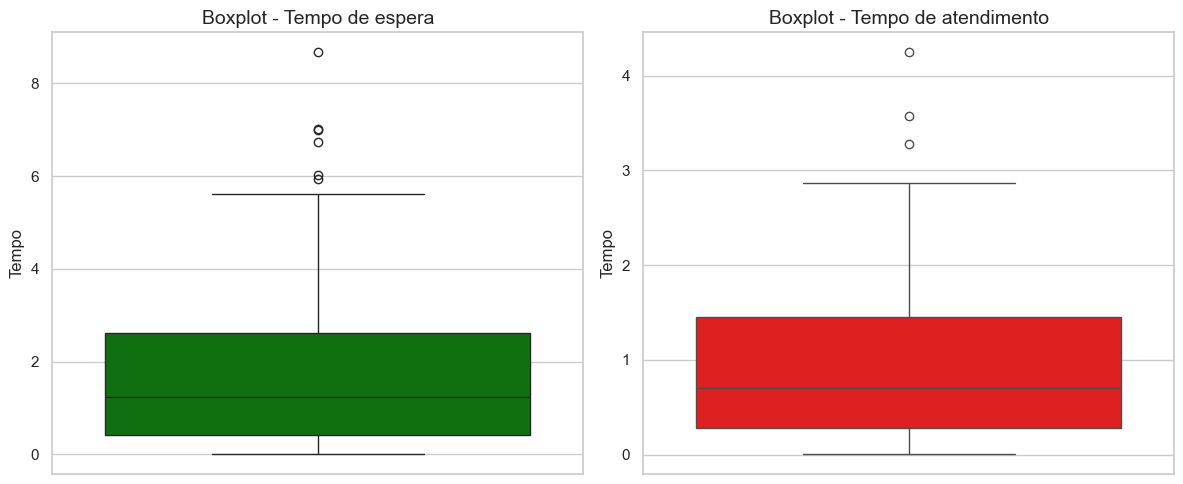

In [4]:

# Remove valores ausentes, se houver
df = df.dropna()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# Boxplot para interarrival_time
plt.subplot(1, 2, 1)
sns.boxplot(y=df["interarrival_time"], color='green')
plt.title("Boxplot - Tempo de espera", fontsize=14)
plt.ylabel("Tempo", fontsize=12)

# Boxplot para service_time
plt.subplot(1, 2, 2)
sns.boxplot(y=df["service_time"], color='red')
plt.title("Boxplot - Tempo de atendimento", fontsize=14)
plt.ylabel("Tempo", fontsize=12)

plt.tight_layout()
plt.show()

# 3. Comparação e inferência

Calcula os intervalos de confiança para as médias dos tempos de atendimento e entre chegadas.

In [5]:
def calcular_ic(dados, confianca):
    media = np.mean(dados)
    n = len(dados)
    std_erro = stats.sem(dados)
    ic = stats.t.interval(confianca, n-1, media, std_erro)
    return ic

niveis_confianca = [0.90, 0.95, 0.99]

print(f'Intervalos de Confiança para Tempo de Atendimento:')
for nivel in niveis_confianca:
    ic = calcular_ic(df['service_time'], nivel)
    print(f'IC {nivel*100}%: [{ic[0]:.2f}, {ic[1]:.2f}]')

print(f'Intervalos de Confiança para Tempo entre Chegadas:')
for nivel in niveis_confianca:
    ic = calcular_ic(df['interarrival_time'], nivel)
    print(f'IC {nivel*100}%: [{ic[0]:.2f}, {ic[1]:.2f}]')


Intervalos de Confiança para Tempo de Atendimento:
IC 90.0%: [0.83, 1.13]
IC 95.0%: [0.80, 1.16]
IC 99.0%: [0.74, 1.21]
Intervalos de Confiança para Tempo entre Chegadas:
IC 90.0%: [1.52, 2.13]
IC 95.0%: [1.46, 2.19]
IC 99.0%: [1.35, 2.31]
